In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h3>Import Dataset</h3>

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [13]:
# Investigate data set size and data type

print(f"Shape of train data set: {X_train_full.shape}")
print(f"Shape of test data set: {X_test.shape}")
print(f"Values in image varies between {np.min(X_train_full)} and {np.max(X_train_full)}")

Shape of train data set: (60000, 28, 28)
Shape of test data set: (10000, 28, 28)
Values in image varies between 0 and 255


In [24]:
# Split training into train and validation sets
# Validation set size is 5000 out of 60000 the full training set

num_validation = 5000
num_train = X_train_full.shape[0] - num_validation
X_valid, X_train = X_train_full[:num_validation]/255, X_train_full[num_validation:]/255
y_valid, y_train = y_train_full[:num_validation], y_train_full[num_validation:]

In [16]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

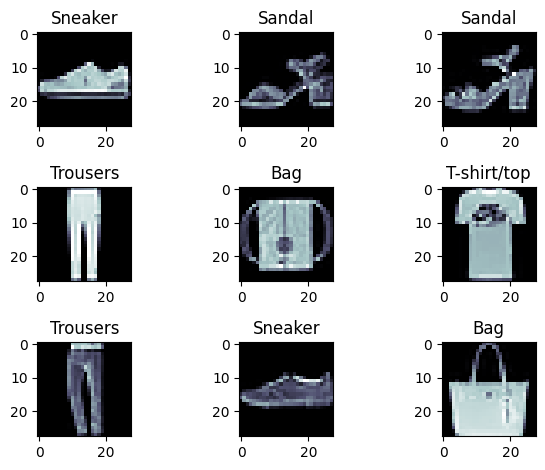

In [57]:
# Look at 9 random samples from the train data set

row_size = 3
col_size = 3
random_ids = np.random.choice(np.arange(num_train), size=row_size*col_size, replace=False)
fig, axes = plt.subplots(row_size, col_size)
for axis_1 in range(0, row_size):
    for axis_2 in range(0, col_size):
        random_id = random_ids[axis_1*col_size+axis_2]
        axes[axis_1, axis_2].imshow(X_train[random_id], cmap='bone')
        axes[axis_1, axis_2].set_title(class_names[y_train[random_id]])
        
plt.tight_layout()
plt.show()
    

<h3>Create and Train model</h3>

In [58]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         2

In [61]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 281s 163ms/step - loss: 0.7643 - accuracy: 0.7280 - val_loss: 0.4144 - val_accuracy: 0.8590
Epoch 2/30
1719/1719 [==============================] - 280s 163ms/step - loss: 0.4356 - accuracy: 0.8501 - val_loss: 0.3016 - val_accuracy: 0.8902
Epoch 3/30
1719/1719 [==============================] - 281s 164ms/step - loss: 0.3724 - accuracy: 0.8722 - val_loss: 0.2794 - val_accuracy: 0.9022
Epoch 4/30
1719/1719 [==============================] - 279s 162ms/step - loss: 0.3329 - accuracy: 0.8869 - val_loss: 0.2630 - val_accuracy: 0.9074
Epoch 5/30
1719/1719 [==============================] - 280s 163ms/step - loss: 0.3111 - accuracy: 0.8937 - val_loss: 0.2601 - val_accuracy: 0.9038
Epoch 6/30
1719/1719 [==============================] - 280s 163ms/step - loss: 0.2839 - accuracy: 0.9043 - val_loss: 0.2403 - val_accuracy: 0.9098
Epoch 7/30
1719/1719 [==============================] - 280s 163ms/step - loss: 0.2720 - accuracy: 0.9070 - val_

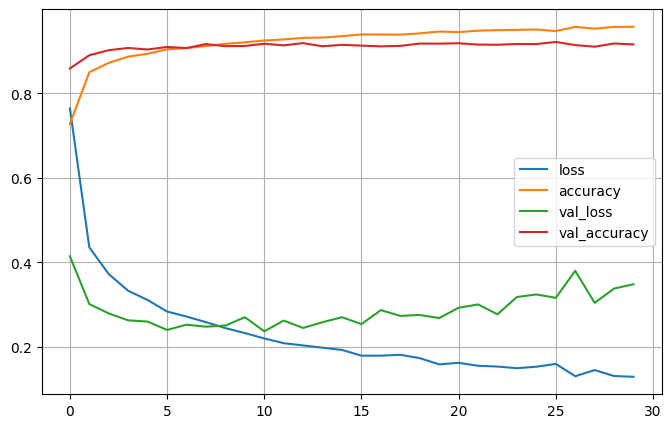

In [63]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [64]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 14s 43ms/step - loss: 88.0985 - accuracy: 0.8553


[88.0984878540039, 0.8553000092506409]

In [66]:
model.save("conv_model.keras")